Data Source: <a href="https://data.cityofnewyork.us/Transportation/2017-Yellow-Taxi-Trip-Data/biws-g3hs">2017 Yellow Taxi Trip Data</a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import dask.dataframe as dd

%matplotlib inline

C:\Anaconda3\lib\site-packages\dask\config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}


In [3]:
from dask.distributed import Client
client = Client()

C:\Anaconda3\lib\site-packages\distributed\config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [4]:
data = dd.read_csv("2017_Yellow_Taxi_Trip_Data.csv")

In [5]:
data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,09/14/2017 09:04:35 PM,09/14/2017 09:50:20 PM,1,16.70,2,N,132,107,1,52.0,0.0,0.5,11.7,5.76,0.3,70.26
1,2,09/14/2017 09:14:04 PM,09/14/2017 09:21:58 PM,3,1.46,1,N,162,107,1,7.5,0.5,0.5,1.0,0.00,0.3,9.80
2,2,09/14/2017 09:26:55 PM,09/14/2017 09:42:13 PM,2,2.28,1,N,113,88,2,11.5,0.5,0.5,0.0,0.00,0.3,12.80
3,1,09/14/2017 09:08:41 PM,09/14/2017 09:18:28 PM,1,1.60,1,N,236,238,2,9.0,0.5,0.5,0.0,0.00,0.3,10.30
4,1,09/14/2017 09:34:48 PM,09/14/2017 10:06:50 PM,1,7.40,1,N,238,148,2,28.0,0.5,0.5,0.0,0.00,0.3,29.30


## Which regions have most pickups and drop-offs?

In [7]:
pickup_loc = data.groupby('PULocationID')['PULocationID'].count().compute()
drop_loc = data.groupby('DOLocationID')['DOLocationID'].count().compute()

In [8]:
pickup = pd.DataFrame({'LocationId':pickup_loc.index, 'pickup_count':pickup_loc.values})
pickup.sort_values(['pickup_count'], ascending=False, inplace=True)
pickup.head(10)

,LocationId,pickup_count
207,237,4442294
140,161,4274032
206,236,4023665
162,186,3973288
141,162,3863529
200,230,3841712
204,234,3702711
149,170,3632477
40,48,3566794
68,79,3327326


In [9]:
dropoff = pd.DataFrame({'LocationId':drop_loc.index, 'dropoff_count':drop_loc.values})
dropoff.sort_values(['dropoff_count'], ascending=False, inplace=True)
dropoff.head(10)

,LocationId,dropoff_count
155,161,4197865
229,236,4150955
230,237,3908234
164,170,3618960
223,230,3522229
156,162,3450268
227,234,3171724
180,186,3090148
46,48,3075486
136,142,2930684


## Plot the distribution of taxi pick-up with time

In [10]:
data['pickup_datetime'] = data['tpep_pickup_datetime'].str[11:17] + data['tpep_pickup_datetime'].str[-2:]
pickup_timing = data.groupby('pickup_datetime')['pickup_datetime'].count().compute()

In [11]:
am_timing = pickup_timing[(pickup_timing.index.str.endswith('AM')) & (pickup_timing.index.str.startswith('12'))]
pm_timing = pickup_timing[(pickup_timing.index.str.endswith('PM')) & (pickup_timing.index.str.startswith('12'))]
after12_am_timing = pickup_timing[(pickup_timing.index.str.endswith('AM')) & (~pickup_timing.index.str.startswith('12'))]
after12_pm_timing = pickup_timing[(pickup_timing.index.str.endswith('PM')) & (~pickup_timing.index.str.startswith('12'))]
am_timing = pd.concat([am_timing, after12_am_timing])
pm_timing = pd.concat([pm_timing, after12_pm_timing])

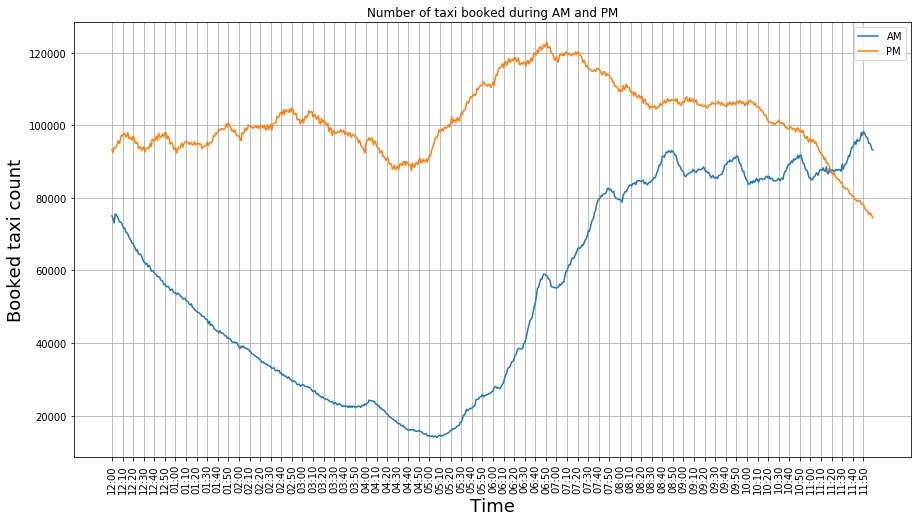

In [12]:
plt.figure(figsize=(15, 8))
plt.plot(am_timing.index.str[:-3], am_timing.values)
plt.plot(pm_timing.index.str[:-3], pm_timing.values)
plt.tick_params(axis='x', rotation = 90)
plt.xticks(am_timing.index.str[:-3][::10])
plt.legend(["AM", "PM"])
plt.title("Number of taxi booked during AM and PM")
plt.ylabel("Booked taxi count", rotation=90, fontsize=18)
plt.xlabel("Time", fontsize=18)
plt.grid()
plt.show()

## Plot the distribution of taxi drop-off with time

In [12]:
a = 5

In [13]:
data['dropoff_datetime'] = data['tpep_dropoff_datetime'].str[11:17] + data['tpep_dropoff_datetime'].str[-2:]
dropoff_timing = data.groupby('dropoff_datetime')['dropoff_datetime'].count().compute()

distributed.comm.tcp - WARNING - Closing dangling stream in <TCP local=tcp://127.0.0.1:62875 remote=tcp://127.0.0.1:62771>
distributed.comm.tcp - WARNING - Closing dangling stream in <TCP local=tcp://127.0.0.1:62876 remote=tcp://127.0.0.1:62771>


In [16]:
am_timing = dropoff_timing[(dropoff_timing.index.str.endswith('AM')) & (dropoff_timing.index.str.startswith('12'))]
pm_timing = dropoff_timing[(dropoff_timing.index.str.endswith('PM')) & (dropoff_timing.index.str.startswith('12'))]
after12_am_timing = dropoff_timing[(dropoff_timing.index.str.endswith('AM')) & (~dropoff_timing.index.str.startswith('12'))]
after12_pm_timing = dropoff_timing[(dropoff_timing.index.str.endswith('PM')) & (~dropoff_timing.index.str.startswith('12'))]
am_timing = pd.concat([am_timing, after12_am_timing])
pm_timing = pd.concat([pm_timing, after12_pm_timing])

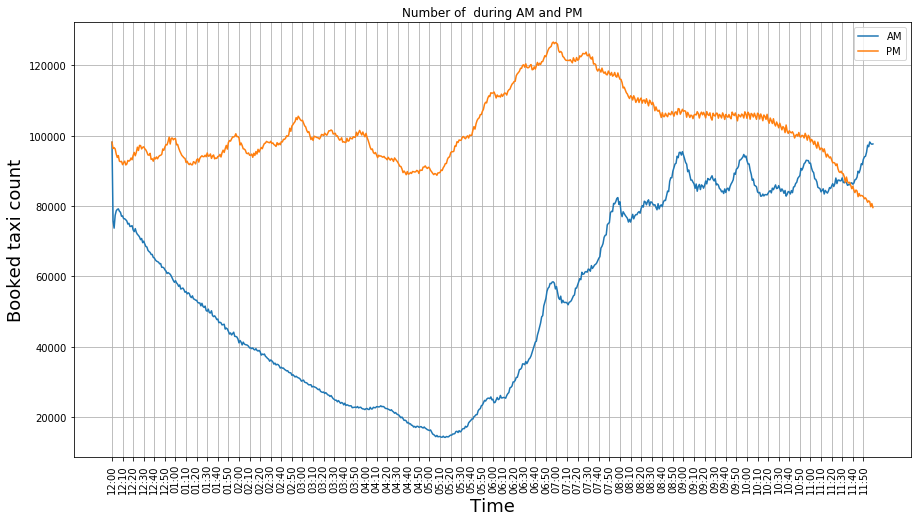

In [17]:
plt.figure(figsize=(15, 8))
plt.plot(am_timing.index.str[:-3], am_timing.values)
plt.plot(pm_timing.index.str[:-3], pm_timing.values)
plt.tick_params(axis='x', rotation = 90)
plt.xticks(am_timing.index.str[:-3][::10])
plt.legend(["AM", "PM"])
plt.title("Number of dropoff during AM and PM")
plt.ylabel("Driooff taxi count", rotation=90, fontsize=18)
plt.xlabel("Time", fontsize=18)
plt.grid()
plt.show()

## Most common payment type used for taxi

In [26]:
%%time
payment_type = data.groupby('payment_type')['payment_type'].count().compute()

Wall time: 4min 32s


In [23]:
payment_type.index = ["Credit Card", "Cash", "No Charge", "Dispute", "Unknown"]
payment = pd.DataFrame(data = {'Payment_type': payment_type.index, 'Count':payment_type.values})
payment.set_index('Payment_type', inplace=True)
payment

,Count
Payment_type,
Credit Card,76244327
Cash,36479462
No Charge,599001
Dispute,174081
Unknown,3


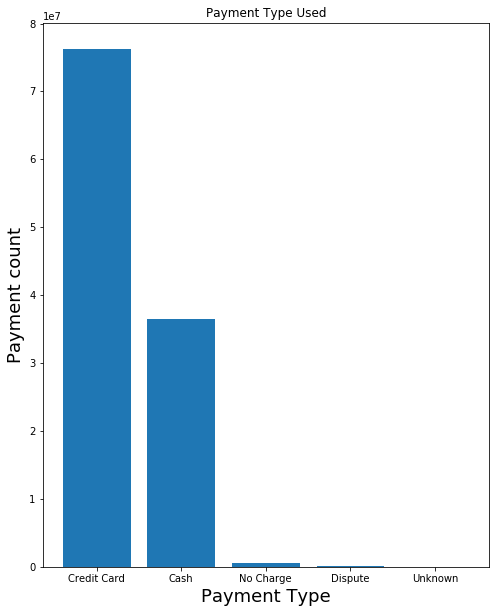

In [29]:
plt.figure(figsize=(8, 10))
plt.bar(payment_type.index, payment_type.values)
plt.title("Payment Type Used")
plt.ylabel("Payment count", rotation=90, fontsize=18)
plt.xlabel("Payment Type", fontsize=18)
plt.show()

In [14]:
client.close()

distributed.nanny - WARNING - Worker process still alive after 4 seconds, killing
distributed.nanny - WARNING - Worker process still alive after 4 seconds, killing
distributed.nanny - WARNING - Worker process still alive after 4 seconds, killing
distributed.nanny - WARNING - Worker process still alive after 4 seconds, killing
